<a href="https://colab.research.google.com/github/ravellom/AI_Lit_Test_Analysis/blob/main/AI_Lit_Test_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Procesamiento de los resultados del test**

Este código permite procesar los resultados del test IA Literacy, una vez descargado en formato CSV desde Google **Forms**

In [1]:
import pandas as pd

# Ruta al archivo CSV
file_path = 'AI_test_piloto1.csv'

# Leer el archivo CSV en un DataFrame de pandas
df = pd.read_csv(file_path, encoding='utf-8')

# Eliminar la columna "Timestamp"
df.drop(columns=["Timestamp"], inplace=True)

# Cambiar el nombre de las 3 columnas con las preguntas generales
df.rename(columns={
    "Por favor, indique su máximo nivel de formación académica completado:": "Nivel Académico",
    "Actualmente, ¿está usted matriculado en alguno de los siguientes niveles educativos?": "Cursando"
}, inplace=True)

# Mostrar las primeras filas del DataFrame para verificar que se leyó correctamente
print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'AI_test_piloto1.csv'

In [ ]:
import plotly.express as px

# Renombrar columnas
df.rename(columns={
    "Género": "Género",
    "Por favor, indique su máximo nivel de formación académica completado:": "Nivel Académico",
    "Actualmente, ¿está usted matriculado en alguno de los siguientes niveles educativos?": "Cursando"
}, inplace=True)

# Ajustar los nombres de las categorías para "Nivel Académico"
nivel_academico_map = {
    "Educación universitaria de pregrado (licenciatura o equivalente)": "Pregrado",
    "Educación universitaria de posgrado (maestría o equivalente)": "Posgrado",
    # Añade aquí los demás mapeos necesarios
}
df['Nivel Académico'] = df['Nivel Académico'].map(nivel_academico_map).fillna(df['Nivel Académico'])

# Gráfico de pastel para "Género"
fig_genero = px.pie(df, names='Género', title="Distribución de Género")
fig_genero.update_traces(textposition='inside', textinfo='percent+label')
fig_genero.update_layout(legend=dict(title='Género', orientation="v", y=0.5, x=1.25))

# Gráfico de pastel para "Nivel Académico"
fig_nivel_academico = px.pie(df, names='Nivel Académico', title="Distribución de Nivel Académico")
fig_nivel_academico.update_traces(textposition='inside', textinfo='percent+label')
fig_nivel_academico.update_layout(legend=dict(title='Nivel Académico', orientation="v", y=0.5, x=1.25))

# Gráfico de pastel para "Cursando"
fig_cursando = px.pie(df, names='Cursando', title="Distribución de Cursando")
fig_cursando.update_traces(textposition='inside', textinfo='percent+label')
fig_cursando.update_layout(legend=dict(title='Cursando', orientation="v", y=0.5, x=1.25))

# Mostrar los gráficos
fig_genero.show()
fig_nivel_academico.show()
fig_cursando.show()

In [ ]:
# Asumiendo que las primeras tres columnas no son parte de las 30 preguntas y la 31ª es una pregunta abierta
columnas_preguntas = df.columns[3:33]  # Seleccionar solo hasta la 30ª pregunta
nuevas_columnas = {col: f"Item{str(index+1).zfill(2)}" for index, col in enumerate(columnas_preguntas)}

# Agregar la última pregunta como "Pregunta abierta"
nuevas_columnas[df.columns[-1]] = "Pregunta abierta"

# Renombrar las columnas en el DataFrame
df.rename(columns=nuevas_columnas, inplace=True)

df.fillna("No responde", inplace=True)

# Verificar los cambios realizados
print(df.columns)

Index(['Género', 'Nivel Académico', 'Cursando', 'Item01', 'Item02', 'Item03',
       'Item04', 'Item05', 'Item06', 'Item07', 'Item08', 'Item09', 'Item10',
       'Item11', 'Item12', 'Item13', 'Item14', 'Item15', 'Item16', 'Item17',
       'Item18', 'Item19', 'Item20', 'Item21', 'Item22', 'Item23', 'Item24',
       'Item25', 'Item26', 'Item27', 'Item28', 'Item29', 'Item30',
       'Pregunta abierta'],
      dtype='object')


In [ ]:
# Ruta al archivo CSV modificado
file_path = 'respuestas_correctas_items.csv'

# Cargar el CSV en un DataFrame
df_correct = pd.read_csv(file_path)

# Visualizar las primeras filas del DataFrame para confirmar
print(df_correct.head())

     Item                                 Respuesta Correcta
0  Item01        Detección de fraude con tarjetas de crédito
1  Item02  Haz un comentario irónico porque esto es mejor...
2  Item03                  Sistemas de gestión de inventario
3  Item04                 Procesamiento del Lenguaje Natural
4  Item05  La IA actúa racionalmente para lograr un objet...


In [ ]:
# Asumiendo que 'df' es tu DataFrame original con las respuestas de los encuestados
# y 'df_correct' es el DataFrame que contiene las respuestas correctas

# Primero, asegúrate de que el índice del DataFrame de respuestas correctas se alinea con los ítems
df_correct.set_index('Item', inplace=True)

# Ahora, iteramos sobre cada columna de ítems en el DataFrame original para comparar y asignar valores
for item in df_correct.index:
    correct_answer = df_correct.loc[item, 'Respuesta Correcta']
    if item != 'Item17':
        # Comparar la respuesta del encuestado con la respuesta correcta y asignar 0 o 1
        df[item] = df[item].apply(lambda x: "No responde" if x == "No responde" else (1 if x == correct_answer else 0))
    else:
        # Para el ítem 17, extraer solo los dígitos de la respuesta y comparar la secuencia con la correcta
        df[item] = df[item].apply(lambda x: "No responde" if x == "No responde" else (1 if ''.join(filter(str.isdigit, x)) == correct_answer else 0))

# Verificar el DataFrame resultante
print(df.head())

      Género Nivel Académico  \
0  Masculino        Pregrado   
1   Femenino        Posgrado   
2  Masculino        Pregrado   
3  Masculino        Pregrado   
4   Femenino        Pregrado   

                                            Cursando  Item01  Item02  Item03  \
0  Estudiante de pregrado (licenciatura o equival...       1       0       0   
1                            Estudiante de maestría.       0       0       0   
2                            Estudiante de maestría.       0       0       1   
3                            Estudiante de maestría.       0       0       0   
4                            Estudiante de maestría.       0       0       1   

   Item04  Item05  Item06  Item07  ...  Item22       Item23  Item24  Item25  \
0       0       1       1       0  ...       0            1       0       0   
1       0       1       1       0  ...       1            0       0       1   
2       0       1       0       0  ...       1            1       0       0   
3       0 

In [ ]:
df.to_csv("correcto_final.csv")

In [ ]:
# Sumar las respuestas correctas para cada sujeto (fila)
df['Total Respuestas Correctas'] = df.loc[:, 'Item01':'Item30'].sum(axis=1)

# Aplicar estilos para una mejor visualización
df[['Total Respuestas Correctas']].style.set_properties(**{'background-color': 'black', 'color': 'lime', 'border-color': 'white'})

C:\Users\ravel\AppData\Local\Temp\ipykernel_115872\2599479770.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,Total Respuestas Correctas
0,7
1,8
2,5
3,3
4,8
5,7
6,10
7,13
8,16
9,13


C:\Users\ravel\AppData\Local\Temp\ipykernel_115872\1694447320.py:7: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



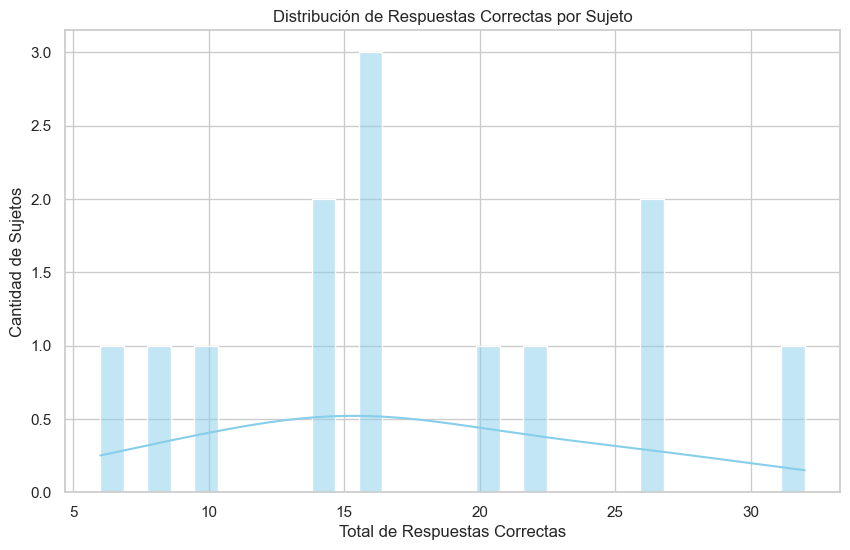

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'df' es tu DataFrame ya actualizado con 0 y 1 para respuestas incorrectas y correctas, respectivamente

# Sumar las respuestas correctas para cada sujeto para obtener un total por sujeto
df['Total Correctas'] = df.iloc[:, 1:].sum(axis=1)  # Ajusta el rango de columnas según sea necesario

# Crear un gráfico de la distribución de los totales de respuestas correctas
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Correctas'], kde=True, bins=30, color='skyblue')
plt.title('Distribución de Respuestas Correctas por Sujeto')
plt.xlabel('Total de Respuestas Correctas')
plt.ylabel('Cantidad de Sujetos')
plt.show()